In [2]:
from ultralytics import YOLO
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os

## Treino

In [ ]:
model = YOLO("yolo12n.pt") 

results = model.train(
        data="checkers.v3i.yolov12/data.yaml",   
        epochs=100,         
        imgsz=640,          
        batch=16,           
        name="checkers_yolo12", 
        patience=20,         
        classes=[1,2]       
    )

New https://pypi.org/project/ultralytics/8.3.250 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.243 🚀 Python-3.13.11 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 5771MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[1, 2], close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=checkers.v3i.yolov12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=checke

## Metricas

In [ ]:
model_path = "resultados/runs_2_classes/detect/checkers_yolo12/weights/best.pt"
model = YOLO(model_path)

print("Running evaluation...")
metrics = model.val(data="checkers.v3i.yolov12/data.yaml", split="test", classes=[1,2])

print("\n--- Evaluation Results ---")
print(f"mAP50 (Accuracy at 50% overlap): {metrics.box.map50:.3f}")
print(f"mAP50-95 (High precision accuracy): {metrics.box.map:.3f}")

Running evaluation...
Ultralytics 8.3.243 🚀 Python-3.13.11 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 5771MiB)
YOLOv12n summary (fused): 159 layers, 2,557,313 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2796.1±973.6 MB/s, size: 35.5 KB)
val: Scanning /home/ricadinho/Desktop/cenas_universidade/2_ano/1_semestre/APVC/Projeto/YoloPreTrained/checkers.v3i.yolov12/test/labels.cache... 135 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 135/135 512.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 4.7it/s 1.9s0.1s
                   all        135       1526      0.929      0.977      0.975      0.622
                 black        123        775      0.922      0.959       0.97      0.613
                 white        120        751      0.936      0.995      0.979      0.631
Speed: 1.8ms preprocess, 6.7ms inference, 0.0ms loss, 2.7ms postprocess per image


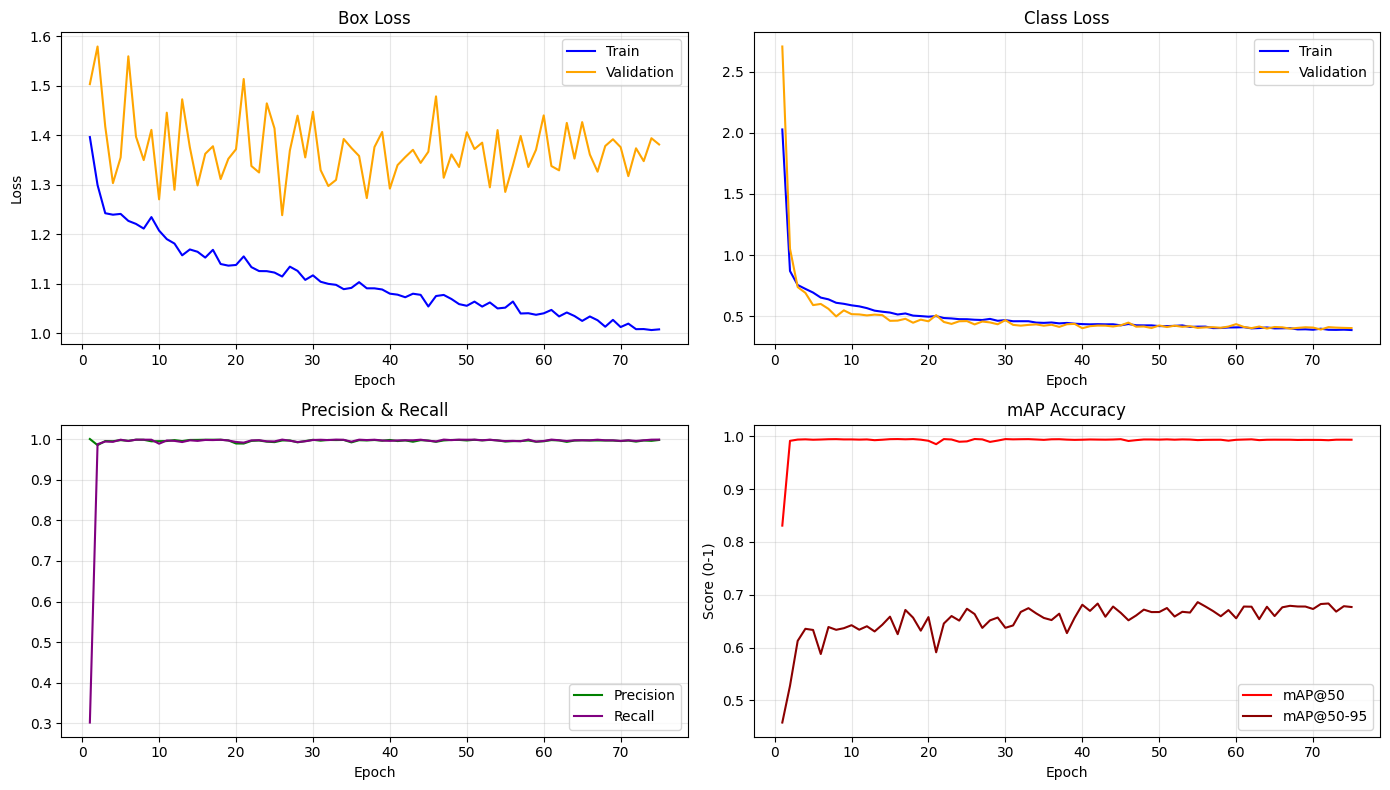

In [ ]:
data = pd.read_csv("resultados/runs_2_classes/detect/checkers_yolo12/results.csv")
data.columns = data.columns.str.strip()

# 3. Setup the window size (width, height)
plt.figure(figsize=(14, 8))
    
# --- Subplot 1: Box Loss (Localization) ---
plt.subplot(2, 2, 1)
plt.plot(data['epoch'], data['train/box_loss'], label='Train', color='blue')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation', color='orange')
plt.title('Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 2: Class Loss (Identification) ---
plt.subplot(2, 2, 2)
plt.plot(data['epoch'], data['train/cls_loss'], label='Train', color='blue')
plt.plot(data['epoch'], data['val/cls_loss'], label='Validation', color='orange')
plt.title('Class Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 3: Precision & Recall ---
plt.subplot(2, 2, 3)
plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision', color='green')
plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall', color='purple')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 4: mAP (Overall Accuracy) ---
plt.subplot(2, 2, 4)
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP@50', color='red')
plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP@50-95', color='darkred')
plt.title('mAP Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score (0-1)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Display the plot window
plt.tight_layout()
plt.show()


## Webcam real time

In [ ]:
# 1. Load your custom model
model = YOLO("resultados/runs_2_classes/detect/checkers_yolo12/weights/best.pt")

    # 2. Open Webcam (Index 0 is usually the default camera)
cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    print("Error: Could not open webcam.")

print("Starting Webcam... Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

        # 3. Run Inference
        # stream=True is more efficient for video
    results = model(frame, stream=True, conf=0.4) 

        # 4. Process results to draw boxes and count pieces
    for result in results:
            # Draw the standard YOLO boxes on the frame
        annotated_frame = result.plot() 

            # --- Custom Logic: Count Pieces ---
            # Extract class IDs from the detection
        cls_ids = result.boxes.cls.cpu().numpy()
        names = result.names
            
            # Count occurrences (Assuming class names: 'black', 'white')
            # Adjust these keys if your yaml names are capitalized differently
        black_count = 0
        white_count = 0
            
        for cls_id in cls_ids:
            class_name = names[int(cls_id)]
            if class_name == 'black':
                black_count += 1
            elif class_name == 'white':
                white_count += 1
            
            # Display the score on the screen
        score_text = f"Black: {black_count}  |  White: {white_count}"
        cv2.putText(annotated_frame, score_text, (20, 50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Show the frame
        cv2.imshow("YOLOv12 Checkers Detection", annotated_frame)

        # 5. Quit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Starting Webcam... Press 'q' to quit.

0: 480x640 1 BOARD, 2 blacks, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 blacks, 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 blacks, 6.2ms
Speed: 1.5ms preprocess, 6.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 blacks, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 blacks, 5.8ms
Speed: 0.9ms preprocess, 5.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 blacks, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 blacks, 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 blacks, 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 0.7ms postproce